In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [260]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [261]:
df


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [262]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

array([[<Axes: title={'center': 'fuel_efficiency_mpg'}>]], dtype=object)

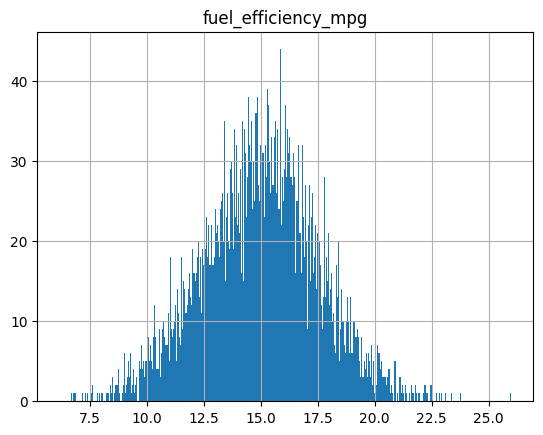

In [263]:
df.hist('fuel_efficiency_mpg', bins = 1000)

Nope - pretty normally distributed. 

In [264]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [265]:
#shuffling data
np.random.seed(42)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

In [266]:

n_val = int(n*.2)
n_test = int(n*.2)
n_train = n - (n_val + n_test)

In [267]:
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [268]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [269]:
df_val.isnull().sum()

engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [270]:
df_train['horsepower'].median()

np.float64(149.0)

In [271]:
horsepower_mean = df_train['horsepower'].mean()

In [272]:
df_val_mean = df_val.copy()
df_val_mean['horsepower'] = df_val['horsepower'].fillna(horsepower_mean)
df_val_zero = df_val.copy()
df_val_zero['horsepower']=df_val['horsepower'].fillna(0)


In [273]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419
...,...,...,...,...,...
7802,290,205.0,3403.401496,2019,13.868607
6780,200,159.0,2752.516039,2009,15.665403
7541,230,202.0,3303.000688,2008,13.613127
1577,220,169.0,3293.420251,2008,13.733343


In [274]:
#mean filled df
df_mean = df_train.copy()
df_mean['horsepower'] = df_mean['horsepower'].fillna(df_mean['horsepower'].mean())
df_mean['horsepower'].median()

np.float64(149.54476367006487)

In [275]:
#zerofilled df
df_zero = df_train.copy()
df_zero['horsepower'] = df_zero['horsepower'].fillna(0)
df_zero['horsepower'].median()

np.float64(146.0)

In [276]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [277]:
features = ['engine_displacement','horsepower',
    'vehicle_weight','model_year']
target = 'fuel_efficiency_mpg'

def format_series(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return df_num


X_train_mean = format_series(df_mean)
y_train_mean = df_mean['fuel_efficiency_mpg'].values

X_train_zero = format_series(df_zero)
y_train_zero = df_zero['fuel_efficiency_mpg'].values


In [278]:
w_0_mean, w_mean = train_linear_regression(X_train_mean,y_train_mean)
w_0_zero, w_zero = train_linear_regression(X_train_zero, y_train_zero)

In [279]:
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)
y_pred_mean
y_pred_zero = w_0_zero + X_train_zero.dot(w_zero)
y_pred_zero

483     17.335262
7506    16.292963
8795    17.698851
1688    11.472499
6217    19.231459
          ...    
1696    16.965155
5685     9.939299
6735    17.545413
2052    18.782875
1776    17.865648
Length: 5824, dtype: float64

In [280]:
def rmse(y,y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [281]:
print(rmse(y_train_mean, y_pred_mean))
print(rmse(y_train_zero,y_pred_zero))

0.4624412137959964
0.5202614265099076


In [282]:

X_val_mean = format_series(df_val_mean)
y_val_mean = df_val_mean['fuel_efficiency_mpg'].values
X_val_zero = format_series(df_val_zero)
y_val_zero = df_val_zero['fuel_efficiency_mpg'].values

In [283]:
y_pred_val_mean = w_0_mean + X_val_mean.dot(w_mean)
y_pred_val_zero = w_0_zero + X_val_zero.dot(w_zero)

In [284]:
print(round(rmse(y_val_mean, y_pred_val_mean),2))
print(round(rmse(y_val_zero, y_pred_val_zero),2))

0.46
0.52


mean imputing reduces the rmse in this case.

In [285]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [290]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_zero, y_train_zero, r=r)
    y_pred = w_0+X_val_zero.dot(w)
    print('%6s' %r, round(rmse(y_val_zero, y_pred),4))

     0 0.5174
  0.01 0.5171
   0.1 0.5188
     1 0.5222
     5 0.5229
    10 0.523
   100 0.5231


In [287]:
w_0+X_val_zero.dot(w)

6163    16.157034
3313    15.079143
4781    11.930033
8210    16.285447
6713     9.336717
          ...    
7802    13.327491
6780    16.263614
7541    13.649346
1577    13.578915
3906    16.340704
Length: 1940, dtype: float64

In [288]:
y_pred = w_0 + X_val_zero.dot(w)
